In [1]:
import numpy as np
import pandas as pd

In [2]:
file= pd.read_csv("D:\\Downloads\\Market_Basket_Optimisation.csv")

In [3]:
file

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(file)

7500

In [5]:
from apyori import apriori

In [6]:
l=[]
for i in range(1,7500):
    l.append([str(file.values[i,j]) for j in range(0,20)])

In [7]:
association_rules = apriori(l, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [8]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'shrimp', 'pasta'})
frozenset({'light cream', 'chicken', 'nan'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'cooking oil', 'spaghetti', 'ground beef'})
frozenset({'escalope', 'mushroom cream sauce', 'nan'})
frozenset({'escalope', 'pasta', 'nan'})
frozenset({'frozen vegetables', 'spaghetti', 'ground beef'})
frozenset({'frozen vegetables', 'olive oil', 'milk'})
frozenset({'frozen vegetables', 'shrimp', 'mineral water'})
frozenset({'frozen vegetables', 'spaghetti', 'olive oil'})
frozenset({'frozen vegetables', 'shrimp', 'spaghetti'})
frozenset({'frozen vegetables', 'tomatoes', 'spaghetti'})
frozenset({'grated cheese', 'spaghetti', 'ground beef'})
frozenset({'mineral water', 'herb & pepper', 'ground beef'})


In [11]:
def inspect(association_results):
    lhs = [tuple(result[2][0][0])[0] for result in association_results]
    rhs = [tuple(result[2][0][1])[0] for result in association_results]
    supports = [result[1] for result in association_results]
    confidences= [result[2][0][2] for result in association_results]
    lifts= [result[2][0][3] for result in association_results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [12]:
final= pd.DataFrame(inspect(association_results), columns = ['Product 1','Product 2', 'Support', 'Confidence','Lift'] )

In [13]:
final.nlargest(n=10, columns= 'Support')

,Product 1,Product 2,Support,Confidence,Lift
3,herb & pepper,ground beef,0.016002,0.323450,3.291116
20,herb & pepper,ground beef,0.016002,0.323450,3.291116
12,frozen vegetables,ground beef,0.008668,0.311005,3.164484
32,frozen vegetables,ground beef,0.008668,0.311005,3.164484
5,whole wheat pasta,olive oil,0.008001,0.271493,4.129671
27,whole wheat pasta,olive oil,0.008001,0.271493,4.129671
14,shrimp,frozen vegetables,0.007201,0.306818,3.217943
25,spaghetti,olive oil,0.007201,0.203008,3.087938
35,shrimp,frozen vegetables,0.007201,0.306818,3.217943
44,spaghetti,olive oil,0.007201,0.203008,3.087938


<BarContainer object of 48 artists>

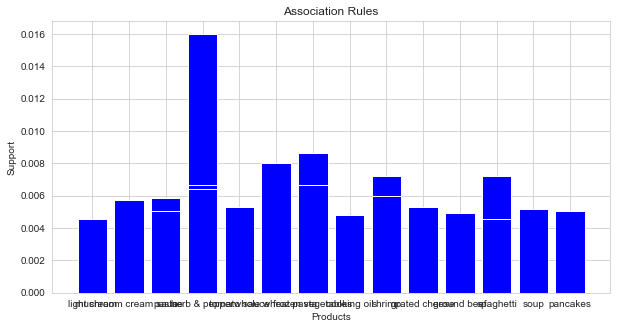

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Association Rules')
plt.xlabel('Products')
plt.ylabel('Support')
plt.bar(final['Product 1'], final['Support'], color='blue')